### Import Library

In [1]:
import pandas as pd # Digunakan untuk membaca file CSV atau Excel
import numpy as np # Digunkanan untuk operasi matematika
import matplotlib.pyplot as plt # Digunakan untuk membuat plot
from sklearn.model_selection import train_test_split # Digunakan untuk membagi data menjadi data training dan data testing
from sklearn.naive_bayes import GaussianNB # Algoritma Naive Bayes
from sklearn.metrics import accuracy_score # Menghitung akurasi
from sklearn.metrics import confusion_matrix # Menghitung confusion matrix
from sklearn.metrics import classification_report # Menghitung classification report
from sklearn.preprocessing import MinMaxScaler # Digunakan untuk menskala agar nilai tidak memiliki rentang yang terlalu jauh
from sklearn.preprocessing import LabelEncoder # Digunakan untuk mengubah data kategorikal menjadi numerik
import seaborn as sb # Digunakan untuk membuat plot
import pickle # Digunakan untuk menyimpan model

### Read Dataset


In [2]:
df_fruit = pd.read_excel('fruit.xlsx') # Membaca data fruit.xlsx
df_fruit.head() # Menampilkan 5 data pertama

,diameter,weight,red,green,blue,name
0,2.96,86.76,172,85,2,orange
1,3.91,88.05,166,78,3,orange
2,4.42,95.17,156,81,2,orange
3,4.47,95.60,163,81,4,orange
4,4.48,95.76,161,72,9,orange


In [3]:
df_fruit.info() # Menampilkan informasi data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   diameter  10000 non-null  float64
 1   weight    10000 non-null  float64
 2   red       10000 non-null  int64  
 3   green     10000 non-null  int64  
 4   blue      10000 non-null  int64  
 5   name      10000 non-null  object 
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB


In [4]:
df_fruit.empty # Memeriksa apakah ada data kosong

False

In [5]:
df_fruit.describe() # Menampilkan statistik deskriptif

,diameter,weight,red,green,blue
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9.975685,175.050792,153.847800,76.010600,11.363200
std,1.947844,29.212119,10.432954,11.708433,9.061275
min,2.960000,86.760000,115.000000,31.000000,2.000000
25%,8.460000,152.220000,147.000000,68.000000,2.000000
50%,9.980000,174.985000,154.000000,76.000000,10.000000
75%,11.480000,197.722500,161.000000,84.000000,17.000000
max,16.450000,261.510000,192.000000,116.000000,56.000000


In [6]:
pd.unique(df_fruit['name'])

array(['orange', 'grapefruit'], dtype=object)

In [7]:
df_fruit['name'].value_counts()

name
orange        5000
grapefruit    5000
Name: count, dtype: int64

### Label Encoder



In [8]:
le = LabelEncoder()
df_fruit['name'] = le.fit_transform(df_fruit['name'])
df_fruit['name'].value_counts()

name
1    5000
0    5000
Name: count, dtype: int64

### Split Independent dan Dependent Variabel

In [11]:
x = df_fruit.drop('name', axis=1) # Menghapus kolom name selainnya akan menjadi variabel x
y = df_fruit['name'] # Mengambil kolom name menjadi variabel y



### Fitur Scaling


In [13]:
scaller = MinMaxScaler() # Membuat objek scaler
scaller.fit(x) # Melatih scaler
x = scaller.transform(x) # Mengubah data menjadi skala

### Split Train Test

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Membagi data menjadi data training dan data testing

### Klasifikasi Naive-Bayes

In [15]:
klasifikasi = GaussianNB() # Membuat objek klasifikasi dengan algoritma Naive Bayes
klasifikasi.fit(x_train, y_train) # Melatih klasifikasi

GaussianNB()

### Prediksi


In [16]:
y_pred = klasifikasi.predict(x_test) # Melakukan prediksi
y_pred

array([0, 1, 1, ..., 0, 1, 0])

In [17]:
klasifikasi.predict_proba(x_test) # Melakukan prediksi probabilitas

array([[9.90834609e-01, 9.16539145e-03],
       [4.44231567e-02, 9.55576843e-01],
       [3.70725238e-04, 9.99629275e-01],
       ...,
       [9.95832252e-01, 4.16774771e-03],
       [3.20203323e-06, 9.99996798e-01],
       [9.96362604e-01, 3.63739558e-03]])

### Akurasi dan Evaluasi

In [18]:
print("Nilai Akurasi Adalah : ", accuracy_score(y_test, y_pred) * 100)

Nilai Akurasi Adalah :  92.0


              precision    recall  f1-score   support

           0       0.91      0.93      0.92       988
           1       0.93      0.91      0.92      1012

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



<Axes: >

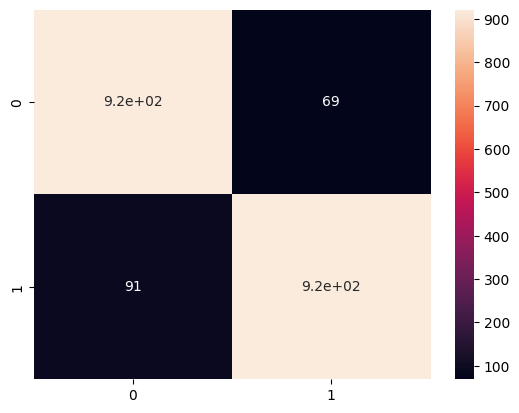

In [19]:
print(classification_report(y_test, y_pred))

sb.heatmap(confusion_matrix(y_test, y_pred), annot=True)

### Klasifikasi Data Baru

In [20]:
new_fruit = [[4.48, 95.76, 161, 72, 9]] # Memasukkan data baru
klasifikasi.predict(new_fruit) # Melakukan prediksi
print(klasifikasi.predict(new_fruit)) # Melakukan prediksi
print(klasifikasi.predict_proba(new_fruit)) # Melakukan prediksi probabilitas

[0]
[[1. 0.]]


### Model

In [21]:
pickle.dump(klasifikasi, open('fruit_bayes.pkl', 'wb')) # Menyimpan model